# Importing necessary Libraries

In [185]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from  sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from flask import Flask, render_template, request
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")

# Reading the Dataset

Read data via read_excel function

In [235]:
# Import customer data
df = pd.read_excel("Sales_Dataset.xlsx")

Get bottom two rows from dataset

In [106]:
df.tail(2)

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
78023,N00078024,ERP Implementation,Hyderabad,Marketing,0,Loss,2,44432,100K or less,1K or less,0 (No business),Unknown,40K to 50K
78024,N00078025,ERP Implementation,Chennai,Enterprise Sellers,0,Loss,1,36766,100K or less,1K or less,0 (No business),Unknown,30K to 40K


In [107]:
df = df.rename(columns={
    'Technology\nPrimary': 'Technology_Primary',
    'B2B Sales Medium': 'B2B_Sales_Medium',
    'Sales Velocity': 'Sales_Velocity',
    'Sales Stage Iterations': 'Sales_Stage_Iterations',
    'Opportunity Size (USD)': 'Opportunity_Size_USD',
    'Client Revenue Sizing': 'Client_Revenue_Sizing',
    'Client Employee Sizing': 'Client_Employee_Sizing',
    'Business from Client Last Year': 'Business_from_Client_Last_Year',
    'Compete Intel': 'Compete_Intel',
    'Opportunity Status': 'Opportunity_Status'
})


# Exploring the data statistics

## Basic statistics

Features of the dataset

In [108]:
df.columns

Index(['Opportunity ID', 'Technology_Primary', 'City', 'B2B_Sales_Medium',
       'Sales_Velocity', 'Opportunity_Status', 'Sales_Stage_Iterations',
       'Opportunity_Size_USD', 'Client_Revenue_Sizing',
       'Client_Employee_Sizing', 'Business_from_Client_Last_Year',
       'Compete_Intel', 'Opportunity Sizing'],
      dtype='object')

Get datatype of features and Non-null counts

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Opportunity ID                  78025 non-null  object
 1   Technology_Primary              78025 non-null  object
 2   City                            78025 non-null  object
 3   B2B_Sales_Medium                78025 non-null  object
 4   Sales_Velocity                  78025 non-null  int64 
 5   Opportunity_Status              78025 non-null  object
 6   Sales_Stage_Iterations          78025 non-null  int64 
 7   Opportunity_Size_USD            78025 non-null  int64 
 8   Client_Revenue_Sizing           78025 non-null  object
 9   Client_Employee_Sizing          78025 non-null  object
 10  Business_from_Client_Last_Year  78025 non-null  object
 11  Compete_Intel                   78025 non-null  object
 12  Opportunity Sizing              78025 non-null

In [110]:
df.shape

(78025, 13)

Basic statistics of Numerical columns

In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_Velocity,78025.0,43.595348,26.585600,0.0,19.0,43.0,65.0,210.0
Sales_Stage_Iterations,78025.0,2.955732,1.497242,1.0,2.0,3.0,3.0,23.0
Opportunity_Size_USD,78025.0,30085.664992,21169.932617,0.0,13816.0,29845.0,43185.0,149981.0


Data types of the features

In [112]:
df.dtypes

Opportunity ID                    object
Technology_Primary                object
City                              object
B2B_Sales_Medium                  object
Sales_Velocity                     int64
Opportunity_Status                object
Sales_Stage_Iterations             int64
Opportunity_Size_USD               int64
Client_Revenue_Sizing             object
Client_Employee_Sizing            object
Business_from_Client_Last_Year    object
Compete_Intel                     object
Opportunity Sizing                object
dtype: object

Checking for NA values in features

In [113]:
df.isna().any()

Opportunity ID                    False
Technology_Primary                False
City                              False
B2B_Sales_Medium                  False
Sales_Velocity                    False
Opportunity_Status                False
Sales_Stage_Iterations            False
Opportunity_Size_USD              False
Client_Revenue_Sizing             False
Client_Employee_Sizing            False
Business_from_Client_Last_Year    False
Compete_Intel                     False
Opportunity Sizing                False
dtype: bool

Checking Null value counts in features

In [114]:
df.isnull().sum()

Opportunity ID                    0
Technology_Primary                0
City                              0
B2B_Sales_Medium                  0
Sales_Velocity                    0
Opportunity_Status                0
Sales_Stage_Iterations            0
Opportunity_Size_USD              0
Client_Revenue_Sizing             0
Client_Employee_Sizing            0
Business_from_Client_Last_Year    0
Compete_Intel                     0
Opportunity Sizing                0
dtype: int64

Checking for duplicate rows in the dataset

In [115]:
print ('No of duplicate rows present in the dataset:', df.duplicated().sum())

No of duplicate rows present in the dataset: 0


In [116]:
# Drop 'Opportunity ID' as it  dosen't hold much value while building the model
df = df.drop(['Opportunity ID'],axis=1)

List of numerical features of dataset 

In [117]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_features)

Index(['Sales_Velocity', 'Sales_Stage_Iterations', 'Opportunity_Size_USD'], dtype='object')


List of Categorical features of dataset with distinct vaule counts

In [118]:

categorical_features = df.select_dtypes(include = 'object').columns
df[categorical_features].nunique()

Technology_Primary                4
City                              7
B2B_Sales_Medium                  5
Opportunity_Status                2
Client_Revenue_Sizing             5
Client_Employee_Sizing            5
Business_from_Client_Last_Year    5
Compete_Intel                     3
Opportunity Sizing                7
dtype: int64

## Visualizing the dataset

Distplot - Numerical distribution of Guassians
* checking distribution of numerical variables

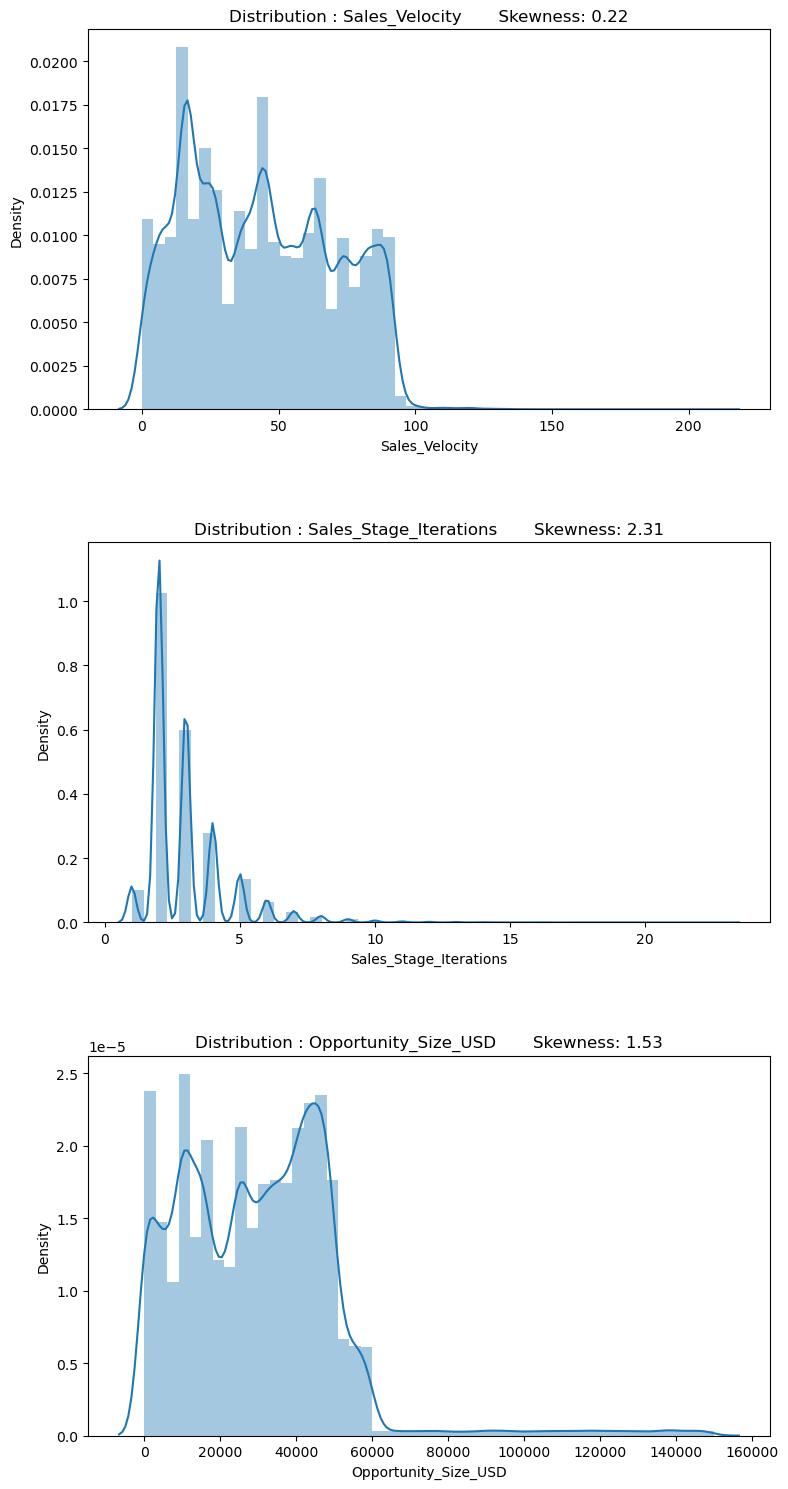

In [119]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (8,15))
for i in range(len(numerical_features)):
    plt.subplot(3,1,i+1)
    sns.distplot(df[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i] +"       Skewness: %.2f"%(df[numerical_features[i]].skew())
    plt.title(title)

fig.tight_layout(h_pad = 5,w_pad = 5)
plt.show()

Inference:

1) We see there are multiple Gaussians in the numerical values

2) The Gaussians are skewed a little which could use correction

Boxplot - How the data is distributed to identify outliers

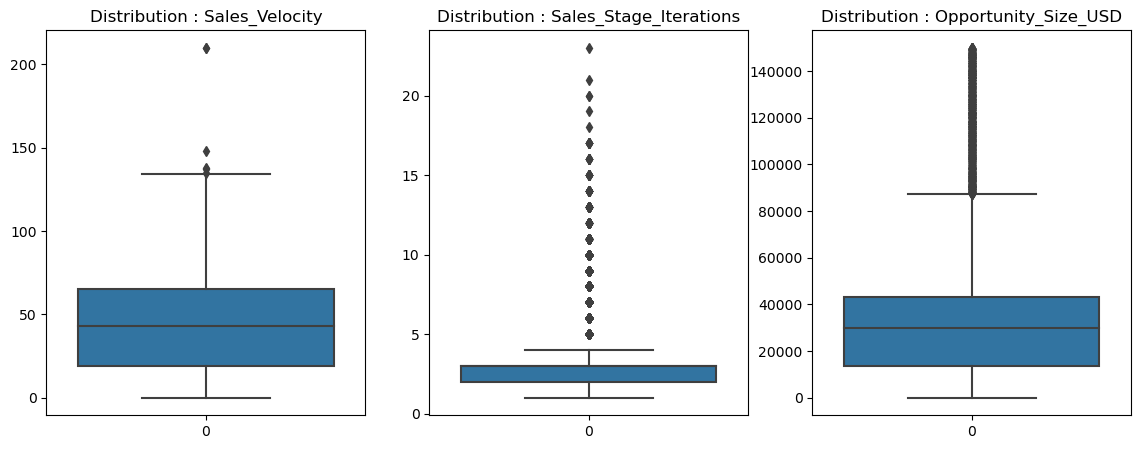

In [120]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (14,5))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.boxplot(df[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()
fig.tight_layout(h_pad = 10,w_pad = 5)

Inference:

1) There are visible outliers in the numerical columns

2) Most outliers are in the Sales Stage Interations and Opportunity Size (USD)

Countplot - To visualize the categorical data

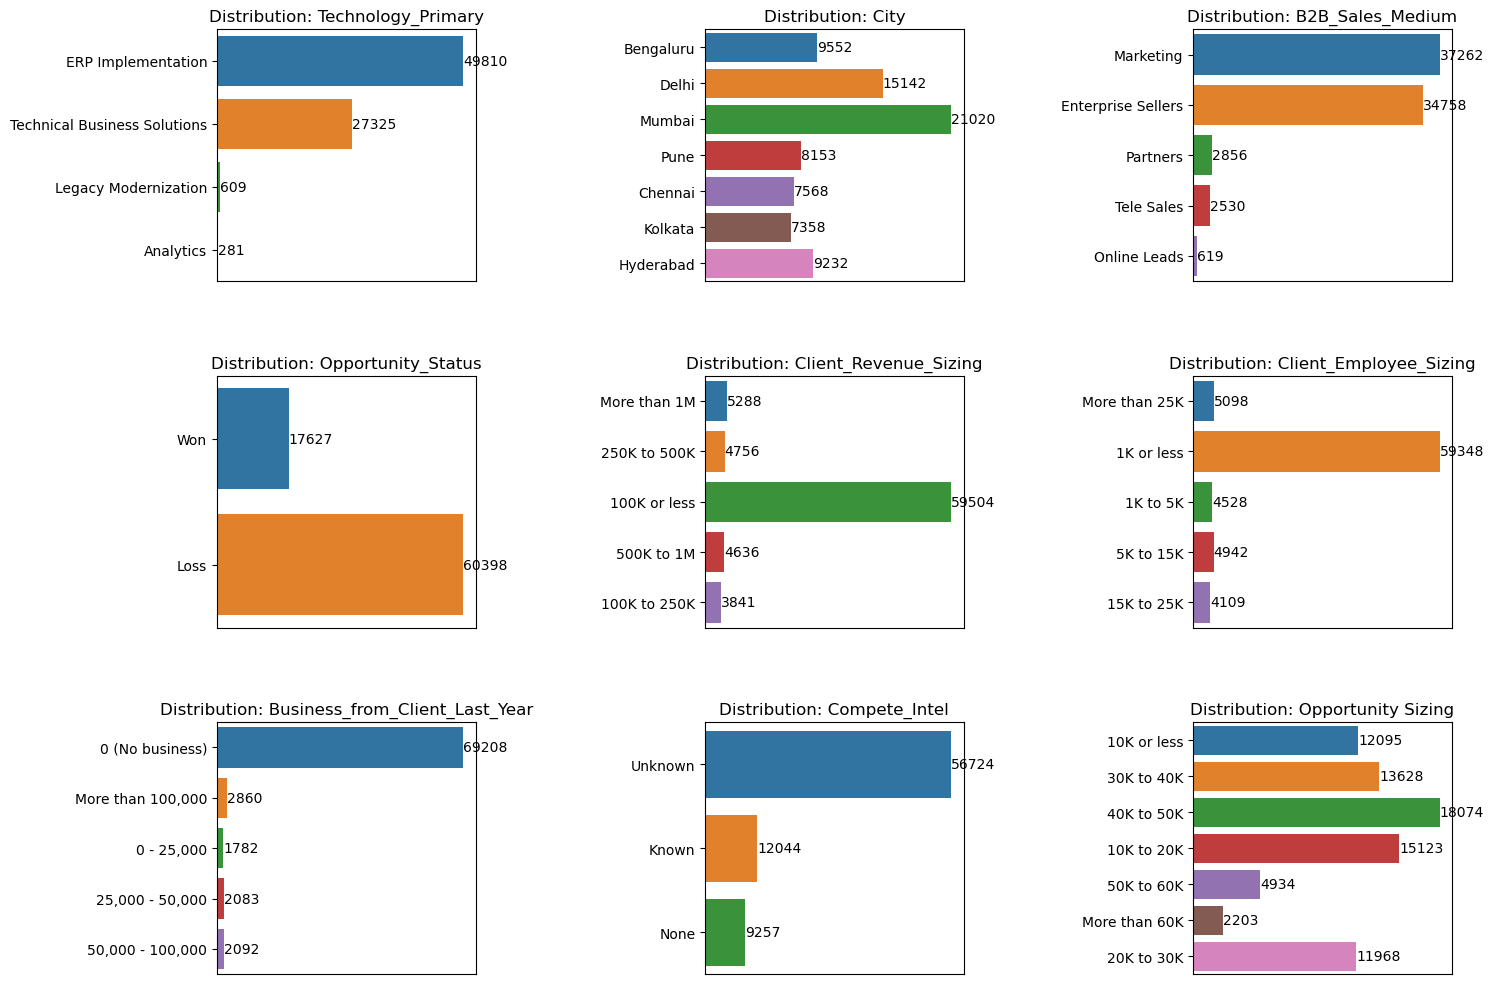

In [121]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    sns.countplot(y=df[categorical_features[i]], ax=ax)
    ax.set_title('Distribution: ' + categorical_features[i])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_visible(False)
    
    # Add count labels to the columns
    for patch in ax.patches:
        x = patch.get_width()
        y = patch.get_y() + patch.get_height() / 2
        ax.text(x, y, int(x), ha='left', va='center')

fig.tight_layout(h_pad=5, w_pad=5)
plt.show()

Inferences and Major trends:

1) We can see the data is imbalanced categorical features

2) Majority of the opportunities are from new businesses

3) The main source of opportunities are from ERP Implementations and Technical Business Solutions

4) The source of the opportunities are primarily from Marketing and Enterprise sellers

5) Conversion rate of opportunities is only 25%

6) The data sets has mainly opportutnies from clients with 1000 or lesser employees

Technology_Primary:
 count                  78025
unique                     4
top       ERP Implementation
freq                   49810
Name: Technology_Primary, dtype: object 

All Values:
 ERP Implementation              49810
Technical Business Solutions    27325
Legacy Modernization              609
Analytics                         281
Name: Technology_Primary, dtype: int64


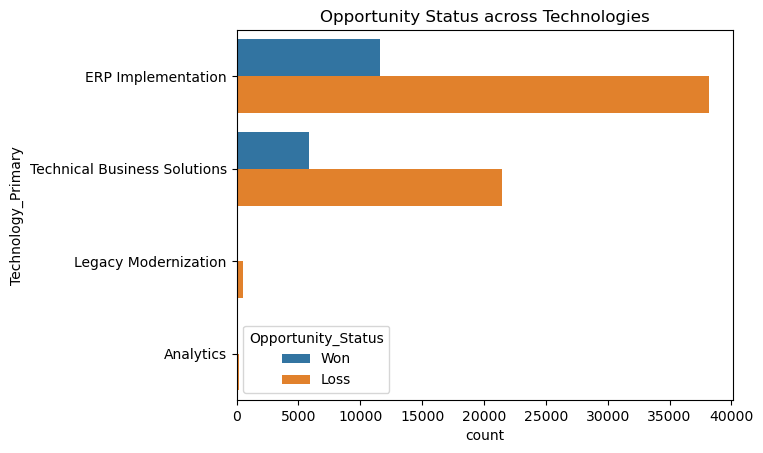

In [122]:
#plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Technology_Primary', hue='Opportunity_Status').set_title('Opportunity Status across Technologies')
print("Technology_Primary:\n",df['Technology_Primary'].describe(),'\n\nAll Values:\n',df['Technology_Primary'].value_counts())

Inference:

The Oppotrunities won v/s lost seem to have similar distribution across the Technologies

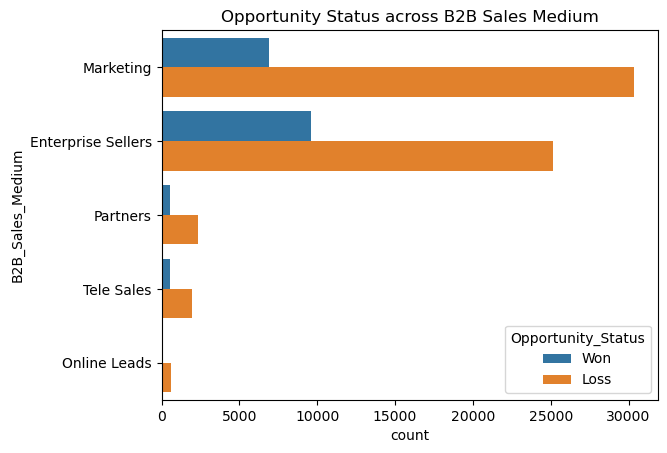

In [123]:
sns.countplot(data=df, y='B2B_Sales_Medium', hue='Opportunity_Status').set_title('Opportunity Status across B2B Sales Medium')
plt.show()

Inference:

The Enterprise sellers have a high seling sccess rate than any other B2B Sales medium

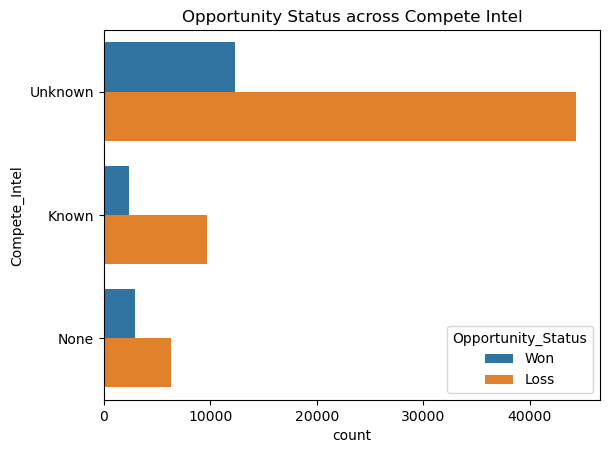

In [124]:
sns.countplot(data=df, y='Compete_Intel', hue='Opportunity_Status').set_title('Opportunity Status across Compete Intel')
plt.show()

Collineairty Matrix Heatmap

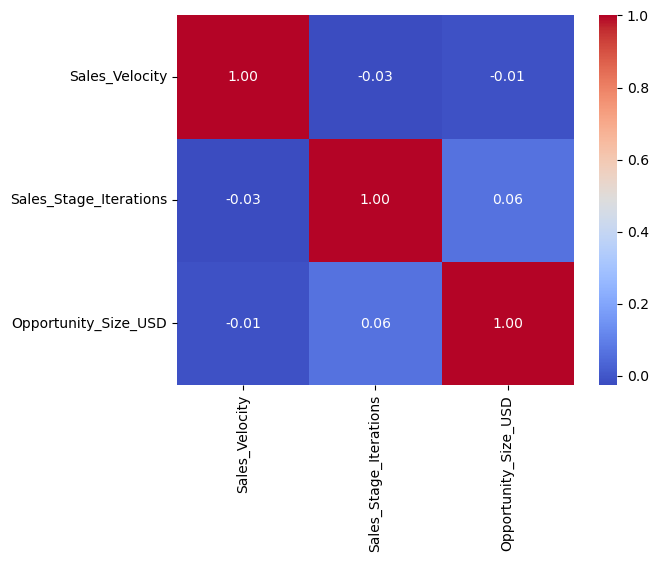

In [125]:
#Plotting a correlation matrix to see how collinear are features to each other
cor = df.corr()
sns.heatmap(cor, annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

Inference:

The numerical variables dosen't show high colliniarity

# Data Manipulation

In [126]:
# dropping 'Opportunity Sizing' as it contains similar value to 'Opportunity Size (USD)'
df = df.drop('Opportunity Sizing',axis = 1)

* **We will now proceed to remove outliers**

In [127]:
percentiles = df['Sales_Velocity'].quantile([0.05,0.95]).values
df['Sales_Velocity'][df['Sales_Velocity'] <= percentiles[0]] = percentiles[0]
df['Sales_Velocity'][df['Sales_Velocity'] >= percentiles[1]] = percentiles[1]

percentiles = df['Sales_Stage_Iterations'].quantile([0.05,0.95]).values
df['Sales_Stage_Iterations'][df['Sales_Stage_Iterations'] <= percentiles[0]] = percentiles[0]
df['Sales_Stage_Iterations'][df['Sales_Stage_Iterations'] >= percentiles[1]] = percentiles[1]

percentiles = df['Opportunity_Size_USD'].quantile([0.05,0.95]).values
df['Opportunity_Size_USD'][df['Opportunity_Size_USD'] <= percentiles[0]] = percentiles[0]
df['Opportunity_Size_USD'][df['Opportunity_Size_USD'] >= percentiles[1]] = percentiles[1]

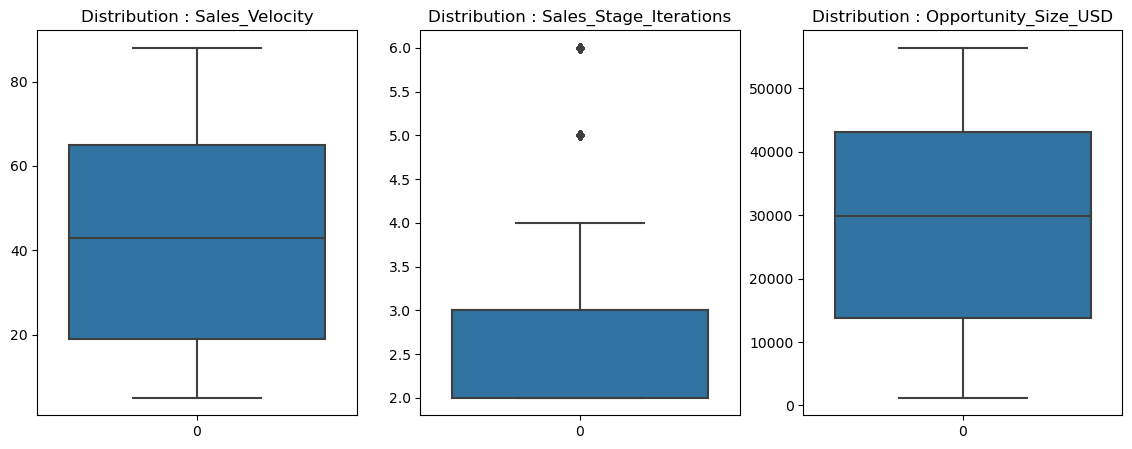

In [128]:
# visualising after outlier removal
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (14,5))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.boxplot(df[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()
fig.tight_layout(h_pad = 10,w_pad = 5)

Inference:  Outliars are treated in the numerical column by replacing the outliers with 95th percentile

# Encoding

In [129]:
# Map 'won' to 1 and 'loss' to 0 in the 'Opportunity Status' column
status_mapping = {'Won': 1, 'Loss': 0}
df['Opportunity_Status'] = df['Opportunity_Status'].map(status_mapping)

In [130]:
# copy df to encoded_df
encoded_df = df.copy()

In [131]:
# Encode categorical values using LabelEncoder
label_encoders = {}
for col in encoded_df.select_dtypes(include=['object']).columns:
    le=LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col])
    label_encoders[col] = le

In [133]:
label_encoders

{'Technology_Primary': LabelEncoder(),
 'City': LabelEncoder(),
 'B2B_Sales_Medium': LabelEncoder(),
 'Client_Revenue_Sizing': LabelEncoder(),
 'Client_Employee_Sizing': LabelEncoder(),
 'Business_from_Client_Last_Year': LabelEncoder(),
 'Compete_Intel': LabelEncoder()}

In [134]:
encoded_df

,Technology_Primary,City,B2B_Sales_Medium,Sales_Velocity,Opportunity_Status,Sales_Stage_Iterations,Opportunity_Size_USD,Client_Revenue_Sizing,Client_Employee_Sizing,Business_from_Client_Last_Year,Compete_Intel
0,1,0,1,76,1,6,1192.8,4,4,0,2
1,1,2,0,63,0,2,1192.8,2,4,0,2
2,3,2,0,24,1,6,7750.0,0,1,0,2
3,3,5,0,16,0,5,1192.8,0,1,0,0
4,1,2,0,69,0,6,32886.0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
78020,1,3,0,5,0,2,53258.0,0,1,3,2
78021,3,4,0,5,1,2,40804.0,0,1,0,2
78022,1,3,0,5,0,2,39241.0,0,1,0,2
78023,1,3,1,5,0,2,44432.0,0,1,0,2


# Feature selection

In [135]:
y = encoded_df['Opportunity_Status']
x = encoded_df.drop('Opportunity_Status',axis = 1)

In [136]:
y.value_counts()

0    60398
1    17627
Name: Opportunity_Status, dtype: int64

## Ovesampling using SMOTE

* to handle the data imbalance in the target 

In [137]:
oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

In [138]:
y.value_counts()

1    60398
0    60398
Name: Opportunity_Status, dtype: int64

## Train test split

In [139]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [140]:
X_train.shape

(84557, 10)

In [141]:
X_test.shape

(36239, 10)

In [142]:
y_test.shape

(36239,)

In [143]:
y_train.shape

(84557,)

## Feature Scaling

In [144]:
# Scale test data
c = x.columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[c] = scaler.fit_transform(X_train[c])
X_test_scaled = X_test.copy()
X_test_scaled[c] = scaler.transform(X_test[c])

## VIF

### check for multicollinearity 

In [145]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Client_Revenue_Sizing,1.30
3,Sales_Velocity,1.20
7,Client_Employee_Sizing,1.17
9,Compete_Intel,1.08
4,Sales_Stage_Iterations,1.07
5,Opportunity_Size_USD,1.06
2,B2B_Sales_Medium,1.03
8,Business_from_Client_Last_Year,1.03
0,Technology_Primary,1.01
1,City,1.00


* The VIF value for all the features supports low show colleniarity. We wil not drop any.

# SVC

In [147]:
# Create an SV classifier object
svc = SVC()

In [153]:
# fit the model with the training data
svc.fit(X_train_scaled,y_train)

SVC()

In [155]:
# predict the target on the train dataset
y_pred_train = svc.predict(X_train_scaled)

In [154]:
# predict the target on the test dataset
y_pred = svc.predict(X_test_scaled)

In [158]:
accuracy_svc = accuracy_score(y_test,y_pred)
accuracy1_svc = accuracy_score(y_train,y_pred_train)
print('accuracy_score on train dataset : ', accuracy1_svc)
print('accuracy_score on test dataset : ', accuracy_svc)

accuracy_score on train dataset :  0.7855765933039252
accuracy_score on test dataset :  0.7748006291564337


# Random Forest Classifier

In [179]:
# Create an random forest classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [180]:
# fit the model with the training data
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [181]:
# predict the target on the train dataset
y_pred_train_rfc = rfc.predict(X_train_scaled)

In [182]:
# predict the target on the test dataset
y_pred_rfc = rfc.predict(X_test_scaled)

In [183]:
accuracy_rfc = accuracy_score(y_test,y_pred_rfc)
accuracy1_rfc = accuracy_score(y_train,y_pred_train_rfc)
print('accuracy_score on train dataset : ', accuracy1_rfc)
print('accuracy_score on test dataset : ', accuracy_rfc)

accuracy_score on train dataset :  0.9954113793062668
accuracy_score on test dataset :  0.8355363006705483


## using cross validation to handle overfitting

In [189]:
k = 5
scores = cross_val_score(rfc, X_train_scaled, y_train, cv=k)

In [190]:
average_accuracy = scores.mean()
print(f"Accuracy scores for each fold: {scores}")
print(f"Average accuracy: {average_accuracy}")

Accuracy scores for each fold: [0.83130322 0.83313623 0.82857312 0.83105671 0.82975578]
Average accuracy: 0.8307650116557118


In [191]:
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [192]:
test_accuracy = rfc.score(X_test_scaled, y_test)
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.8355363006705483


# Logistic Regression

In [174]:
lr = LogisticRegression(solver='lbfgs',max_iter=1000)

In [175]:
# fit the model with the training data
lr.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [176]:
# predict the target on the train data
y_pred_train_lr = lr.predict(X_train_scaled)

In [177]:
# predict the target on the test data
y_pred_lr = lr.predict(X_test_scaled)

In [178]:
accuracy_lr = accuracy_score(y_test,y_pred_lr)
accuracy1_lr = accuracy_score(y_train,y_pred_train_lr)
print('accuracy_score on train dataset : ', accuracy1_lr)
print('accuracy_score on test dataset : ', accuracy_lr)

accuracy_score on train dataset :  0.6906347197748265
accuracy_score on test dataset :  0.6897541322884185


# Hyperparameter tuning to find the best parameters

## **Hypertuning the model using GridSearchCV for Random Forest Classification**

In [152]:
# Set up hyperparameter search space
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

In [98]:
# Initialize RandomForestClassifier
rfc_tuned = RandomForestClassifier()

In [99]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rfc_tuned, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

In [ ]:
# Perform grid search
grid_search.fit(X_train_scaled, y_train)

In [ ]:
# Extract the best hyperparameters from the grid search
best_params = grid_search.best_params_

In [128]:
# Train and evaluate the RandomForestClassifier with the best parameters
rfc_best = RandomForestClassifier(**best_params)

In [ ]:
# fit the model with the training data with best parameters
rfc_best.fit(X_train_scaled, y_train)

In [132]:
# predict the target on the test dataset
y_pred_rfc_best = rfc_best.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test,y_pred_rfc_best)
print('accuracy_score on test dataset : ', accuracy)

In [ ]:
# classification report
print(classification_report(y_test, y_pred_rfc_best))

## **Hypertuning the model using GridSearchCV for SVC Classification**

In [ ]:
# Set up hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto', 0.1, 1, 10, 100],
    'coef0': [0, 1, 2, 3],
    'shrinking': [True, False],
'probability': [True, False],
'tol': [1e-4, 1e-3, 1e-2, 1e-1],
}

In [ ]:
# Initialize SVC model
svc_tuned = SVC()

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

In [ ]:
# Perform grid search
grid_search.fit(X_train_scaled, y_train)

In [ ]:
# Extract the best hyperparameters from the grid search
best_params_svc = grid_search.best_params_

In [ ]:
# Print the best combination of hyperparameters and corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

In [ ]:
# Train and evaluate the RandomForestClassifier with the best parameters
svc_best = RandomForestClassifier(**best_params_svc)

In [ ]:
# fit the model with the training data with best parameters
svc_best.fit(X_train_scaled, y_train)

In [ ]:
# predict the target on the test dataset
y_pred_svc_best = svc_best.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test,y_pred_svc_best)
print('accuracy_score on test dataset : ', accuracy)

# Model Evaluation

In [218]:
accuracy_df = pd.DataFrame({'Model': ['SVC', 'Logistic Regression', 'Random Forest'],
                            'Test Accuracy': [accuracy_svc,accuracy_lr,accuracy_rfc]})


In [219]:
accuracy_df

,Model,Test Accuracy
0,SVC,0.774801
1,Logistic Regression,0.689754
2,Random Forest,0.835536


In [220]:
svc_precision = precision_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)

logreg_precision = precision_score(y_test, y_pred_lr)
logreg_recall = recall_score(y_test, y_pred_lr)

rf_precision = precision_score(y_test, y_pred_rfc)
rf_recall = recall_score(y_test, y_pred_rfc)


In [221]:
performance_df = pd.DataFrame({'Model': ['SVC', 'Logistic Regression', 'Random Forest'],
                               'Precision': [svc_precision, logreg_precision, rf_precision],
                               'Recall': [svc_recall, logreg_recall, rf_recall]})


In [222]:
performance_df

,Model,Precision,Recall
0,SVC,0.790440,0.748097
1,Logistic Regression,0.686642,0.698499
2,Random Forest,0.836486,0.834271


In [223]:
# Calculate F1 scores for each model
f1_svc = f1_score(y_test, y_pred)
f1_log_reg = f1_score(y_test, y_pred_lr)
f1_rf = f1_score(y_test, y_pred_rfc)

In [224]:
# Create a dictionary with model names and their F1 scores
f1_scores_df = pd.DataFrame({"Model": ["SVC", "Logistic Regression", "Random Forest"],
                            "F1 Score": [f1_svc, f1_log_reg, f1_rf]})

In [225]:
f1_scores_df

,Model,F1 Score
0,SVC,0.768686
1,Logistic Regression,0.692520
2,Random Forest,0.835377


In [226]:
# Set the 'Model' column as the index for each DataFrame
accuracy_df.set_index('Model', inplace=True)
performance_df.set_index('Model', inplace=True)
f1_scores_df.set_index('Model', inplace=True)

In [227]:
# Concatenate the three DataFrames along columns
result_df = pd.concat([accuracy_df, performance_df, f1_scores_df], axis=1)

In [230]:
result_df.T

Model,SVC,Logistic Regression,Random Forest
Test Accuracy,0.774801,0.689754,0.835536
Precision,0.790440,0.686642,0.836486
Recall,0.748097,0.698499,0.834271
F1 Score,0.768686,0.692520,0.835377


# Dump the model in pickle file

In [231]:
# Dump the trained random forest model to a pickle file
pickle.dump(rfc, open('model.pkl', 'wb'))

In [232]:
# Dump the scaling model to a pickle file
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [233]:
# Dump the label_encoder to a pickle file
pickle.dump(label_encoders, open('label_encoders.pkl', 'wb'))